# Setup environment

First import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import feature_selection

import preprocess as pp

import weka.core.jvm as jvm

sns.set()
%matplotlib inline

import os
os.makedirs("./images", exist_ok=True)
os.makedirs("./data", exist_ok=True)


# Preprocess data

Read raw data and add column names to it. 
DataFrame info displays some basic information about dataset. We can see that there are 3189 instances without NA objects

In [2]:
df = pp.splice_from_file("data/splice_orig.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 3 columns):
class    3189 non-null object
id       3189 non-null object
dna      3189 non-null object
dtypes: object(3)
memory usage: 74.8+ KB


DataFrame head functions show first couple of rows

In [3]:
df_split = pp.split_features(df)
df_split.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
0,EI,A,G,A,C,C,C,G,C,C,...,G,T,G,C,C,C,C,C,G,C
1,EI,G,A,G,G,T,G,A,A,G,...,C,A,C,G,G,G,G,A,T,G
2,EI,G,G,G,C,T,G,C,G,T,...,G,G,T,T,T,T,C,C,C,C
3,EI,G,C,T,C,A,G,C,C,C,...,C,C,T,T,G,A,C,C,C,T
4,EI,C,A,G,A,C,T,G,G,G,...,G,A,G,A,C,C,A,C,A,G


Most of the values are A, C, T, G. Other values are in negligible quantities.

In [4]:
df_split_X, df_split_y = pp.separate_feature_class(df_split)
pp.count_unique_percent(df_split_X)

C    0.262784
G    0.262496
T    0.241967
A    0.232440
N    0.000293
D    0.000010
R    0.000005
S    0.000005
dtype: float64

In [5]:
odd_rows_dict = pp.get_odd_nucleotide_rows(df_split_X)
df_filt = pp.remove_odd_nucleotide_rows(df_split, odd_rows_dict)
df_filt_X, df_filt_y = pp.separate_feature_class(df_filt)

In [19]:
cols_dna = pp.get_split_col_names()
df_groupby_class = pd.get_dummies(df_filt, columns=cols_dna).groupby(['class']).sum(axis=0)

df_groupby_class.reset_index(level=0, inplace=True)
df_groupby_class.iloc[:, [0, 5, 6, 7, 8, 113, 114, 115, 116]]

,class,dna_2_A,dna_2_C,dna_2_G,dna_2_T,dna_29_A,dna_29_C,dna_29_G,dna_29_T
0,EI,176,229,195,161,443,106,113,99
1,IE,162,235,172,196,762,1,1,1
2,N,437,389,423,399,400,425,409,414


In [7]:
feature_selection.chi2(pd.get_dummies(df_filt_X), pd.get_dummies(df_filt_y))

(array([7.20047844e+00, 8.60102421e+00, 6.29284394e+00, 2.88878111e+00,
        6.78473047e+00, 1.36961666e+01, 2.34476944e+00, 3.41435879e+00,
        1.46359486e+00, 2.93440471e+00, 3.81602045e+00, 2.69413433e+00,
        7.28282863e+00, 1.89390560e+01, 9.48262421e+00, 2.89576210e+00,
        6.81557238e+00, 2.85908020e+01, 3.01375848e+01, 5.14691153e+00,
        9.87165684e+00, 9.22271414e+00, 4.68652017e+01, 1.40081467e+01,
        2.13552965e+00, 3.55834581e+00, 1.32699159e+01, 1.54045854e+01,
        2.63632371e+00, 7.89356469e+00, 1.74871070e+01, 1.31439191e+00,
        5.33676726e+00, 1.21187539e+01, 6.79289059e+01, 3.18335160e+01,
        2.08153934e+01, 3.02482422e+01, 4.14771090e+01, 2.75648010e+01,
        1.67044276e+01, 4.25427444e+00, 1.58654580e+01, 1.32323949e+01,
        1.43435760e+01, 4.65951762e+00, 2.61501117e+01, 2.66822757e+01,
        3.80932288e+01, 2.99797325e+01, 3.01945533e+01, 2.08888126e+01,
        3.81178695e+01, 3.41683356e+01, 2.29351229e+01, 2.210437

# Visual data information

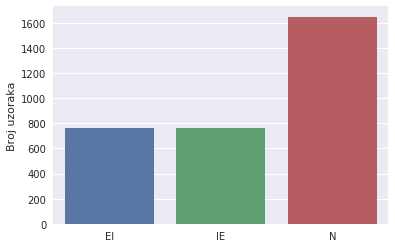

In [8]:
hue_order = df_filt['class'].unique()
ax = sns.countplot(x='class', data=df_filt, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/dataset_class_dist.png")

In [9]:

df_train, df_test = model_selection.train_test_split(df_filt, test_size=0.2, stratify=df_filt['class'], random_state=5)

df_train.to_csv("data/splice_train.csv", index=False)
df_test.to_csv("data/splice_test.csv", index=False)
df_train.head()

,class,dna_1,dna_2,dna_3,dna_4,dna_5,dna_6,dna_7,dna_8,dna_9,...,dna_51,dna_52,dna_53,dna_54,dna_55,dna_56,dna_57,dna_58,dna_59,dna_60
75,EI,G,C,T,G,A,T,A,A,A,...,A,A,A,A,A,A,G,A,G,T
3005,N,T,C,T,G,G,G,C,A,T,...,T,C,A,G,T,T,C,C,T,C
220,EI,G,C,C,G,T,G,G,T,T,...,A,A,A,G,G,C,T,C,C,T
1350,IE,G,A,G,G,G,A,A,A,G,...,G,A,A,G,C,C,C,G,G,G
2693,N,A,C,T,T,C,T,G,C,T,...,A,C,T,G,C,G,C,A,G,G


TypeError: integer argument expected, got float

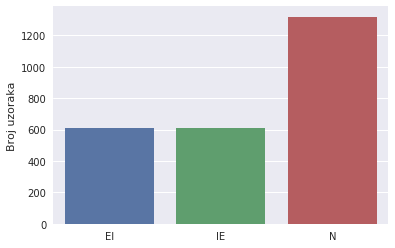

In [11]:
ax = sns.countplot(x='class', data=df_train, order = hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/trainset_class_dist.jpg")

In [ ]:
ax = sns.countplot(x='class', data=df_test, order=hue_order)
ax.set(xlabel='', ylabel='Broj uzoraka')
plt.savefig("images/testset_class_dist.jpg")

[Text(0,0.5,'Broj uzoraka'), Text(0.5,0,'')]

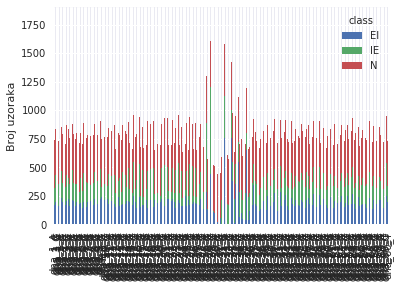

In [12]:
ax = df_groupby_class.set_index('class').T.plot(kind='bar', stacked=True)
ax.set(xlabel='', ylabel='Broj uzoraka')

In [ ]:
plt.savefig("images/nucleotids_byclass.jpg")

# Weka

In [2]:
import weka.core.jvm as jvm
jvm.start(max_heap_size="512m", system_cp=True, packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Adding system classpath
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.5/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.5/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.5/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.5/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.5/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=512m
DEBUG:weka.core.jvm:Package support enabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


JavaException: <Java object at 0x2db04a8>

In [4]:
from weka.core.converters import Loader, Saver
loader = Loader(classname="weka.core.converters.CSVLoader")
data_train = loader.load_file("data/splice_train.csv")
data_test = loader.load_file("data/splice_train.csv")
data_train.class_is_first()
data_test.class_is_first()

In [ ]:
print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

In [9]:
# refresh package cache
import weka.core.packages as packages
packages.refresh_cache()

# list all packages (name and URL)
items = packages.all_packages()
for item in items:
    print(item.name + " " + item.url)
    


AffectiveTweets https://github.com/felipebravom/AffectiveTweets/releases/download/1.0.0/AffectiveTweets1.0.0.zip
AnDE http://prdownloads.sourceforge.net/averagedndepend/AnDE1.2.1.zip?download
AnalogicalModeling https://github.com/garfieldnate/Weka_AnalogicalModeling/releases/download/0.04/Weka_AnalogicalModeling-0.04.zip
ArabicStemmers_LightStemmers http://prdownloads.sourceforge.net/ar-text-mining/ArabicStemmers_LightStemmers_1.0.0.zip?download
Auto-WEKA http://www.cs.ubc.ca/labs/beta/Projects/autoweka/autoweka-2.6.1.zip
CAAR http://downloads.sourceforge.net/project/caar/CAAR.zip
CHIRP https://www.cs.uic.edu/~tdang/file/CHIRP1.0.1.zip
CLOPE http://prdownloads.sourceforge.net/weka/CLOPE1.0.1.zip?download
CVAttributeEval http://prdownloads.sourceforge.net/fsvc/CVAttributeEval1.0.0.zip?download
DMNBtext http://prdownloads.sourceforge.net/weka/DMNBtext1.0.1.zip?download
DTNB http://prdownloads.sourceforge.net/weka/DTNB1.0.4.zip?download
DilcaDistance http://prdownloads.sourceforge.net/wek

In [ ]:
packages.install_package('chiSquaredAttributeEval')
items = packages.installed_packages()
for item in items:
    print(item.name + " " + item.url)

In [ ]:
packages.install_package('SVMAttributeEval')
items = packages.installed_packages()
for item in items:
    print(item.name + " " + item.url)

In [6]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
chisqr_s = ASSearch(classname="weka.attributeSelection.Ranker", options=["-T", "-1.7976931348623157E308", "-N", "20"])
chisqr_e = ASEvaluation(classname="weka.attributeSelection.ChiSquaredAttributeEval")
attsel = AttributeSelection()
attsel.search(chisqr_s)
attsel.evaluator(chisqr_e)
attsel.select_attributes(data_train)

In [ ]:
# refresh package cache
import weka.core.packages as packages
packages.refresh_cache()
packages.is_installed('chiSquaredAttributeEval')

In [7]:
print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 20
attributes: [30 32 31 29 35 28 34 33 25 24 26 23 20 21 22 18 19 17 16 36  0]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 1 class):
	Chi-squared Ranking Filter

Ranked attributes:
1109.4302    31 dna_30
 966.0452    33 dna_32
 959.4816    32 dna_31
 953.336     30 dna_29
 795.4188    36 dna_35
 631.5054    29 dna_28
 488.9084    35 dna_34
 435.6823    34 dna_33
 356.538     26 dna_25
 257.5063    25 dna_24
 251.0488    27 dna_26
 230.1255    24 dna_23
 225.4407    21 dna_20
 215.2521    22 dna_21
 201.8339    23 dna_22
 187.5633    19 dna_18
 185.8257    20 dna_19
 152.0342    18 dna_17
 140.2707    17 dna_16
 121.4042    37 dna_36

Selected attributes: 31,33,32,30,36,29,35,34,26,25,27,24,21,22,23,19,20,18,17,37 : 20

